In [52]:
%pylab inline 
import tensorflow as tf
import pandas as pd
import gc

%load_ext autoreload
%autoreload 2
import deltafestimator

inFN = '/home/kmdalton/sandbox/gfpxfel/20190508_integration_protocol/reflections_pared_2point0_sigma.csv'

Populating the interactive namespace from numpy and matplotlib
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/home/kmdalton/opt/anaconda3/lib/python3.7/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f', 'time', 'gamma', 'beta']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [53]:
df = pd.read_csv(inFN)
df

,Unnamed: 0,A1,A2,A3,A4,A5,A6,A7,A8,A9,...,dK,dL,FOBS,D,SIGMA(FOBS),FCALC,PHIC,MERGEDH,MERGEDK,MERGEDL
0,228,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-0.012071,0.103879,228.8830,2.905350,3.53497,168.6290,-93.110600,5.0,17.0,4.0
1,301,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-0.014891,-0.028632,948.6030,3.396242,3.92472,832.0560,-179.999000,0.0,14.0,8.0
2,305,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,0.004250,0.132955,638.6790,3.526446,2.67359,454.5690,66.215500,5.0,14.0,1.0
3,325,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-0.009486,0.074892,154.1380,3.778644,8.59072,110.8900,-179.968000,5.0,13.0,0.0
4,327,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,0.009894,0.193858,333.3220,3.605332,4.17305,160.8690,175.425000,-7.0,13.0,2.0
5,349,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-0.005989,-0.011030,379.7570,4.032848,4.49329,325.8840,0.001423,0.0,12.0,6.0
6,350,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-0.004597,0.027917,639.8250,4.185301,2.72985,553.7010,-111.238000,2.0,12.0,3.0
7,366,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,-0.014417,-0.048691,103.8380,4.444983,6.09797,26.3656,90.054300,0.0,11.0,5.0
8,369,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,0.027260,0.331668,458.8420,3.575825,3.00371,360.6270,85.859900,-10.0,11.0,6.0
9,402,-0.002160,-0.010405,-0.01086,-0.019217,0.001961,0.000614,0.001246,0.012199,-0.009362,...,0.013090,0.149603,960.7320,4.722683,2.89662,854.6300,-168.728000,-5.0,10.0,2.0


In [54]:
columns = {
    'RUN' : int,
    'PHINUMBER': int,
    'SERIES': str, 
    'event_time': float, 
    'FOBS': float,
    'SIGMA(FOBS)': float,
    'FCALC': float,
    'PHIC': float,
    'H': int,
    'K': int, 
    'L': int,
    'MERGEDH': int,
    'MERGEDK': int,
    'MERGEDL': int,
    'IOBS': float,
    'SIGMA(IOBS)': float,
    'D': float, 
    'ipm2': float,
    'ipm3': float,
    'ipm2_xpos': float,
    'ipm3_xpos': float,
    'ipm2_ypos': float,
    'ipm3_ypos': float,
}      
#Pare data to remove combinations of h,k,l,run,phi that don't have both on and off data
#dataframe = gammastimator.pare_data(I, columns)

for k in df:
    if k in columns:
        df[k] = df[k].astype(columns[k])
    else:
        del df[k]


100%|██████████| 1/1 [23:22<00:00, 1402.78s/it]

Completed in 1409.069401025772 s


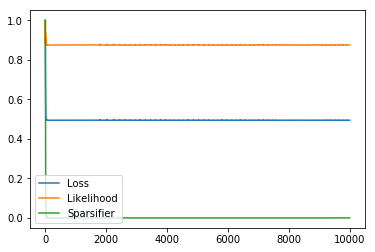

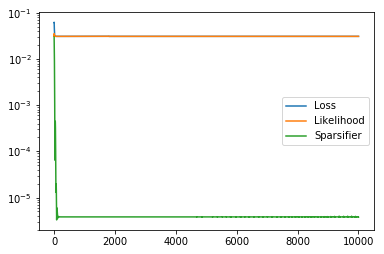

In [55]:
#This will only take a moment and we can use it to diagnose bugs
from time import time
start = time()


lambdas = [0.03]
tolerance = -1.
intensitykey = 'ipm2'
maxiter = 10000
referencekey = 'FCALC'

config = tf.ConfigProto(device_count = {
    "GPU":0
})


optim = tf.train.AdamOptimizer(0.05)

n = deltafestimator.deltafestimator_physical_gaussian(df)
n.train({'LAMBDA': lambdas}, maxiter=maxiter, tolerance=tolerance, optimizer=optim, config=config)

Loss = n.log

plt.figure()
for k in ['Loss', 'Likelihood', 'Sparsifier']:
    plt.plot(Loss['Step'], Loss[k]/Loss[k].max(), label=k)
plt.legend()

plt.figure()
for k in ['Loss', 'Likelihood',  'Sparsifier']:
    plt.plot(Loss['Step'], Loss[k], label=k)
plt.legend()
plt.semilogy()


stop = time()
print("Completed in {} s".format(stop-start))



F = n.result['Miller'].join(df.groupby(['MERGEDH', 'MERGEDK', 'MERGEDL']).first()[['D', 'PHIC']], ['H', 'K', 'L'])
F = F.set_index(['H', 'K', 'L'])
I = n.result['Icryst']
I[intensitykey] = n.result[intensitykey][intensitykey]

In [50]:
F['SIGMA(DeltaF)'] = np.isnan(1./(1e-32 + n.result['Hessian Diagonal']['Hessian Diagonal'] - n.result['Hessian Diagonal']['Hessian Diagonal'].min()))

/home/kmdalton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6575: RuntimeWarning: All-NaN slice encountered
  xmin = min(xmin, np.nanmin(xi))
/home/kmdalton/opt/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6576: RuntimeWarning: All-NaN slice encountered
  xmax = max(xmax, np.nanmax(xi))


ValueError: max must be larger than min in range parameter.

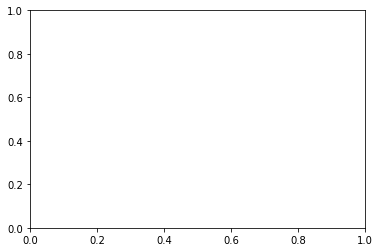

In [40]:
F['SIGMA(DeltaF)'] = 1./(1e-10 + (n.result['Hessian Diagonal']['Hessian Diagonal'] - n.result['Hessian Diagonal']['Hessian Diagonal'].min()))

_ = hist(F['SIGMA(DeltaF)'], 200, color='k', log=True)
plt.figure()
_ = hist(F['DeltaF'], 200, color='k', log=True)


/home/kmdalton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:17: RuntimeWarning: invalid value encountered in sqrt


[]

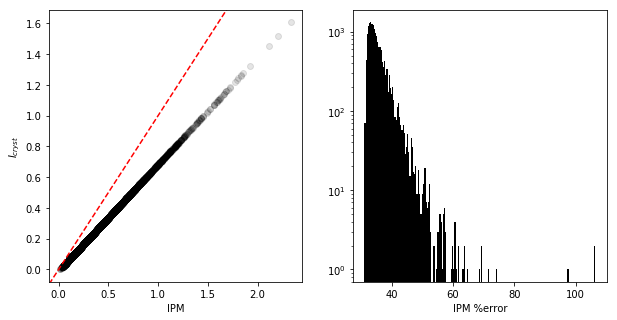

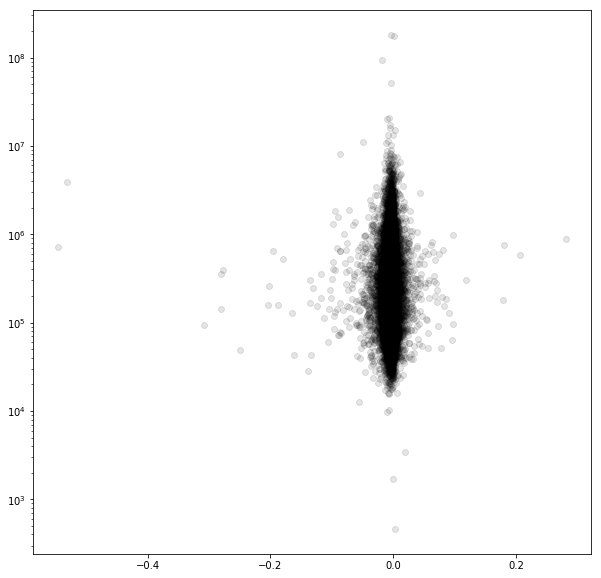

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
Icryst = I['Icryst']
IPM = I[intensitykey]
ax1.plot(IPM, Icryst, 'ko', alpha=0.1)
ax1.set_xlabel("IPM")
ax1.set_ylabel(r"$I_{cryst}$")
lim = [
    np.max([ax1.get_xlim(), ax1.get_ylim()]),
    np.min([ax1.get_xlim(), ax1.get_ylim()])
]
ax1.plot(lim, lim, '--r', scalex=False, scaley=False)

_ = ax2.hist(100.*(IPM-Icryst)/IPM, 200, color='k', log=True)
ax2.set_xlabel("IPM %error")

f = plt.figure(figsize=(10,10))
plt.plot(F['DeltaF'], np.sqrt(F['SIGMA(DeltaF)']), 'ko', alpha=0.1)
plt.semilogy()

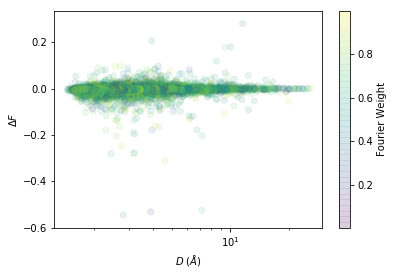

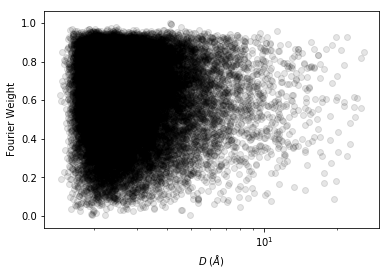

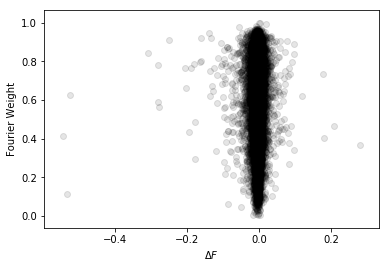

In [22]:
from subprocess import Popen



spacegroup_number = 4
A,B,C = 62.186, 51.071, 69.952
alpha,beta,gamma = 90, 90, 90

outFN = 'sparse_deltaF.mtz'
tmpFN = outFN[:-3] + 'txt'
dmin = -1.
dmax = 100.

sf_key = 'DeltaF'
err_key = 'SIGMA(DeltaF)'
phase_key = 'PHIC'
weight_key = 'WT'

tmpvar = F['SIGMA(DeltaF)'].copy()
F['SIGMA(DeltaF)'] = np.sqrt(np.abs(F['SIGMA(DeltaF)']))

bfac=0.
F['WT'] = (1 + F['SIGMA(DeltaF)']/F['SIGMA(DeltaF)'].mean()  +\
            0.0*F['DeltaF']**2/(F['DeltaF'].mean()**2) )**-1

F['WT'] = F['WT']*np.exp(-bfac*F['D']**2)

plt.figure()
colors = F[weight_key]
plt.scatter(F['D'], F[sf_key], c=colors, alpha=0.1)
plt.colorbar(label=r"Fourier Weight")
plt.semilogx()
plt.xlabel(r"$D\ (\AA)$")
plt.ylabel(r"$\Delta F$")

plt.figure()
plt.scatter(F['D'], F[weight_key], color='k', alpha=0.1)
plt.semilogx()
plt.xlabel(r"$D\ (\AA)$")
plt.ylabel(r"Fourier Weight")


plt.figure()
colors = F[weight_key]
plt.scatter(F[sf_key], F[weight_key], c='k', alpha=0.1)
plt.xlabel(r"$\Delta F$")
plt.ylabel(r"Fourier Weight")

reflections = []
for (h,k,l), D in F[(F['D'] > dmin)&(F['D'] < dmax)].iterrows():
    reflections.append("{: 5d}{: 5d}{: 5d}{:14.2f}{:14.2f}{:14.2f}{:15.7f}\n".format(int(h),int(k),int(l),D[sf_key], D[err_key], D[phase_key], D[weight_key]))

with open(tmpFN, 'w') as out:
    out.write(''.join(reflections))


command = f"""f2mtz HKLIN {tmpFN} HKLOUT {outFN} << EOF
CELL {A:.3f} {B:.3f} {C:.3f} {alpha:.3f} {beta:.3f} {gamma:.3f}
LABOUT H   K  L   FP SFP  PHIC  WT
CTYPE  H   H  H   F  Q    P     W
FORMAT '(3(F5.0),3(F14.2),F15.7)'
SYMM {spacegroup_number:d}
EOF
"""

p = Popen(command, shell=True)

F['SIGMA(DeltaF)'] = tmpvar



[]

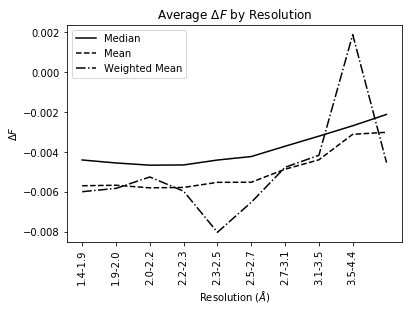

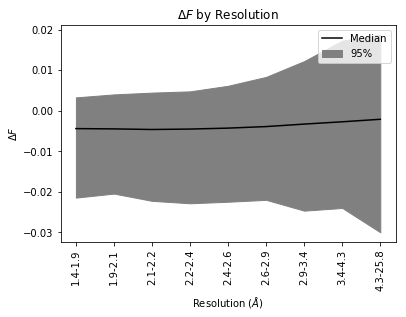

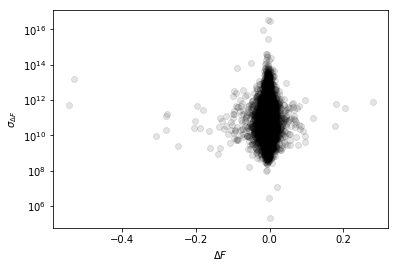

In [23]:
plt.figure()
bins = 10
binedges = np.percentile(F['D'], np.linspace(0, 100, bins+1))
binedges = np.vstack((binedges[:-1], binedges[1:])).T
plt.plot([F[(F['D'] >= i) & (F['D'] <= j)]['DeltaF'].median() for i,j in binedges], '-k', label='Median')
plt.plot([F[(F['D'] >= i) & (F['D'] <= j)]['DeltaF'].mean() for i,j in binedges], '--k', label='Mean')
plt.plot([np.average(F[(F['D'] >= i) & (F['D'] <= j)]['DeltaF'], weights=F[(F['D'] >= i) & (F['D'] <= j)]['SIGMA(DeltaF)']**-1) for i,j in binedges], '-.k', label='Weighted Mean')
_ = plt.xticks(range(bins-1), [f'{i:0.1f}-{j:0.1f}' for i,j in binedges], rotation=90)
plt.xlabel('Resolution ($\AA$)')
plt.ylabel('$\Delta F$')
plt.title('Average $\Delta F$ by Resolution')
plt.legend()

plt.figure()
binedges = np.percentile(F['D'], np.linspace(0, 100, bins))
binedges = np.vstack((binedges[:-1], binedges[1:])).T
plt.plot([F[(F['D'] >= i) & (F['D'] <= j)]['DeltaF'].median() for i,j in binedges], '-k', label='Median')
plt.fill_between(np.arange(bins-1), 
                 [np.percentile(F[(F['D'] >= i) & (F['D'] <= j)]['DeltaF'],2.5) for i,j in binedges], 
                 [np.percentile(F[(F['D'] >= i) & (F['D'] <= j)]['DeltaF'],97.5) for i,j in binedges],  
                 color='grey', label='95%')
_ = plt.xticks(range(bins-1), [f'{i:0.1f}-{j:0.1f}' for i,j in binedges], rotation=90)
plt.xlabel('Resolution ($\AA$)')
plt.ylabel('$\Delta F$')
plt.title('$\Delta F$ by Resolution')
plt.legend()

plt.figure()
plt.plot(F['DeltaF'], F['SIGMA(DeltaF)'], 'ko', alpha=0.1)
plt.xlabel("$\Delta F$")
plt.ylabel("$\sigma_{\Delta F}$")
plt.semilogy()

/home/kmdalton/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in sqrt


[]

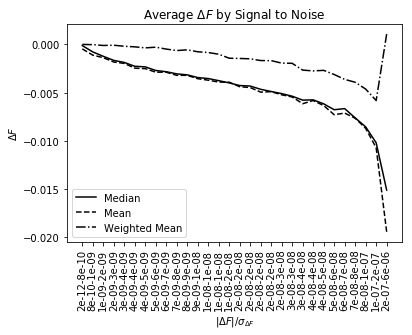

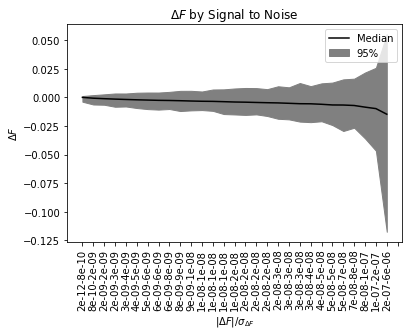

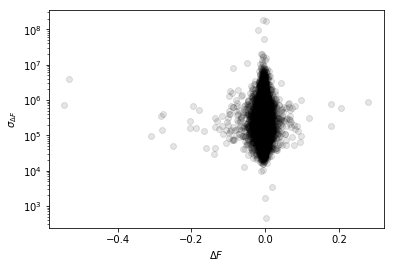

In [24]:
plt.figure()
bins = 30
F['SNR'] = np.abs(F['DeltaF'])/ np.sqrt(np.abs(F['SIGMA(DeltaF)']))
#F['SNR'] =  np.sqrt(np.abs(F['SIGMA(DeltaF)']))
binedges = np.percentile(F['SNR'], np.linspace(0, 100, bins+1))
binedges = np.vstack((binedges[:-1], binedges[1:])).T
plt.plot([F[(F['SNR'] >= i) & (F['SNR'] <= j)]['DeltaF'].median() for i,j in binedges], '-k', label='Median')
plt.plot([F[(F['SNR'] >= i) & (F['SNR'] <= j)]['DeltaF'].mean() for i,j in binedges], '--k', label='Mean')
plt.plot([np.average(F[(F['SNR'] >= i) & (F['SNR'] <= j)]['DeltaF'], weights=F[(F['SNR'] >= i) & (F['SNR'] <= j)]['SIGMA(DeltaF)']**-1) for i,j in binedges], '-.k', label='Weighted Mean')
_ = plt.xticks(range(bins), [f'{i:1.0e}-{j:1.0e}' for i,j in binedges], rotation=90)
plt.xlabel(r'$|\Delta F| / \sigma_{\Delta F}$')
plt.ylabel('$\Delta F$')
plt.title('Average $\Delta F$ by Signal to Noise')
plt.legend()

plt.figure()
binedges = np.percentile(F['SNR'], np.linspace(0, 100, bins))
binedges = np.vstack((binedges[:-1], binedges[1:])).T
plt.plot([F[(F['SNR'] >= i) & (F['SNR'] <= j)]['DeltaF'].median() for i,j in binedges], '-k', label='Median')
plt.fill_between(np.arange(bins-1), 
                 [np.percentile(F[(F['SNR'] >= i) & (F['SNR'] <= j)]['DeltaF'],2.5) for i,j in binedges], 
                 [np.percentile(F[(F['SNR'] >= i) & (F['SNR'] <= j)]['DeltaF'],97.5) for i,j in binedges],  
                 color='grey', label='95%')
_ = plt.xticks(range(bins), [f'{i:1.0e}-{j:1.0e}' for i,j in binedges], rotation=90)
plt.xlabel(r'$|\Delta F| / \sigma_{\Delta F}$')
plt.ylabel('$\Delta F$')
plt.title('$\Delta F$ by Signal to Noise')
plt.legend()

plt.figure()
plt.plot(F['DeltaF'], np.sqrt(F['SIGMA(DeltaF)']), 'ko', alpha=0.1)
plt.xlabel("$\Delta F$")
plt.ylabel("$\sigma_{\Delta F}$")
plt.semilogy()

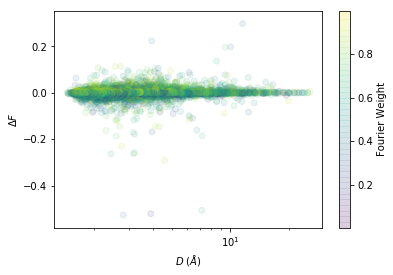

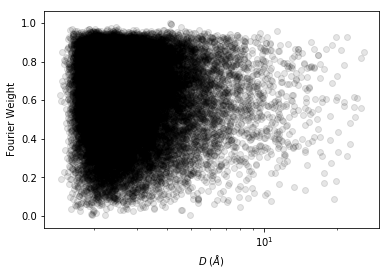

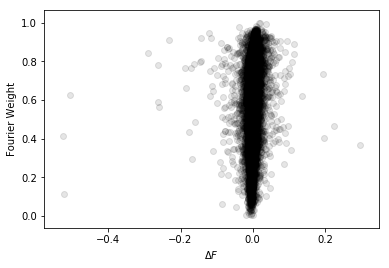

In [25]:
from subprocess import Popen

F['Debiased_DeltaF'] = 0.

bins = 50
F['SNR'] =  np.abs(F['DeltaF'])/np.sqrt(np.abs(F['SIGMA(DeltaF)']))
binedges = np.percentile(F['SNR'], np.linspace(0, 100, bins+1))
binedges = np.vstack((binedges[:-1], binedges[1:])).T
for i,j in binedges:
    msk = (F['SNR'] >= i) & (F['SNR'] <= j)
    F['Debiased_DeltaF'][msk] = F[msk]['DeltaF'] - F[msk]['DeltaF'].median()

spacegroup_number = 4
A,B,C = 62.186, 51.071, 69.952
alpha,beta,gamma = 90, 90, 90

outFN = 'debiased_sparse_deltaF.mtz'
tmpFN = outFN[:-3] + 'txt'
dmin = -1.
dmax = 100.

sf_key = 'Debiased_DeltaF'
err_key = 'SIGMA(DeltaF)'
phase_key = 'PHIC'
weight_key = 'WT'

tmpvar = F['SIGMA(DeltaF)'].copy()
F['SIGMA(DeltaF)'] = np.sqrt(np.abs(F['SIGMA(DeltaF)']))

bfac=0.
F['WT'] = (1 + F['SIGMA(DeltaF)']/F['SIGMA(DeltaF)'].mean()  +\
            0.0*F[sf_key]**2/(F[sf_key].mean()**2) )**-1

F['WT'] = F['WT']*np.exp(-bfac*F['D']**2)

plt.figure()
colors = F[weight_key]
plt.scatter(F['D'], F[sf_key], c=colors, alpha=0.1)
plt.colorbar(label=r"Fourier Weight")
plt.semilogx()
plt.xlabel(r"$D\ (\AA)$")
plt.ylabel(r"$\Delta F$")

plt.figure()
plt.scatter(F['D'], F[weight_key], color='k', alpha=0.1)
plt.semilogx()
plt.xlabel(r"$D\ (\AA)$")
plt.ylabel(r"Fourier Weight")


plt.figure()
colors = F[weight_key]
plt.scatter(F[sf_key], F[weight_key], c='k', alpha=0.1)
plt.xlabel(r"$\Delta F$")
plt.ylabel(r"Fourier Weight")

reflections = []
for (h,k,l), D in F[(F['D'] > dmin)&(F['D'] < dmax)].iterrows():
    reflections.append("{: 5d}{: 5d}{: 5d}{:14.2f}{:14.2f}{:14.2f}{:15.7f}\n".format(int(h),int(k),int(l),D[sf_key], D[err_key], D[phase_key], D[weight_key]))

with open(tmpFN, 'w') as out:
    out.write(''.join(reflections))


command = f"""f2mtz HKLIN {tmpFN} HKLOUT {outFN} << EOF
CELL {A:.3f} {B:.3f} {C:.3f} {alpha:.3f} {beta:.3f} {gamma:.3f}
LABOUT H   K  L   FP SFP  PHIC  WT
CTYPE  H   H  H   F  Q    P     W
FORMAT '(3(F5.0),3(F14.2),F15.7)'
SYMM {spacegroup_number:d}
EOF
"""

p = Popen(command, shell=True)

F['SIGMA(DeltaF)'] = tmpvar

